# No Show Appointments Analysis
## By Hope Ugwuabanachi


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
    
    
### Question(s) for Analysis

1.Ratio of people going or not going for appointment
2. What gender goes to the doctor more often
3. Which of these males and femals actually went to see the doctor after scheduling an appointment
4. What gender goes to the doctor more.

**No-Show Appointment Dataset**


This dataset collects information from 100k medical appointments in Brazil.
It is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
Its a univariant Dataset having 14 attributes listed below.
Area is Healthcare sector.
We will be finding out what factors are important for us to know in order to predict 
if a patient will show up for their scheduled appointment.
We will be having 1 dependent variables and 3 independent variable.
I will exploring the dataset by knowing what percentage booked an appointment with the doctor and how many actually went for it, what percentage of females and males went to see the doctor after booking an appointment, whats the most common disease amongst patients that went for an appointment

**Dataset Attributes:**

1. patientID
2. AppointmentID
3. Gender
4. AppointmentDay
5. ScheduledDay - what day the patient set up their appointment.
6. Age - how the patient is
7. Neighbourhood - Location of the hospital
8. Scholarship - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. Hypertension
10. Diabetes
11. Alcoholism 
12. Handcap
13. SMS_received
14. No-show - Yes OR No to show if the patient showed up or not( 'yes' if they did not show up and 'no' if they did)

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt
sns.set_style('darkgrid')

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01   13% |████▎                           | 1.4MB 27.0MB/s eta 0:00:01    53% |█████████████████▏              | 5.6MB 28.4MB/s eta 0:00:01    93% |█████████████████████████████▉  | 9.7MB 27.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01  6% |██▏                             | 890kB 25.3MB/s eta 0:00:01    26% |████████▍                       | 3.5MB 26.5MB/s eta 0:00:01    45% |██████████████▌                 | 6.1MB 25.9MB/s eta 0:00:01    73% |███████████████████████▌        | 9.8MB 25.9MB/s eta 0:00:01    82% |██████████████████████████▌     | 11.1MB 25.1MB/s eta 0:00:01    90% |█████████████████████████████   | 12.1MB 25.9MB/s eta 0:00:01    99% |████████████████████████████████| 13.4MB 26.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load data 
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check dataframe size

df_noshow.shape

(110527, 14)

In [8]:
df_noshow.describe

<bound method NDFrame.describe of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.1139

In [10]:
# check for missing values

df_noshow.isnull().sum().any()

False

In [11]:
# check for duplicated values

df_noshow.duplicated().sum()

0

**My Findings:**
1. Dataset has 110527 rows with 14 columns
2. It has 0 null values 
3. It has 0 duplicates
4. Patient age is between -1(dont know why) and 115 with an average value of 37
5. 9.8% of patients have scholarship
6. 19.7% of patients are having high blood pressure
7. 7.18% of patients are having diabetes
8. 3% of patients are alcoholic
9. 22% are handicap
10. 32% received sms


### Data Cleaning

**Data Cleaning steps I will be doing:**
1. Drop columns that we wont be using for analysis
2. set all column names to lower case 
3. correct column names
4. reverse no-show column to showed
5. delete age with wrong values like ages less that 0

In [12]:
# Drop PatientID and AppointmentID because they wont be needed for our analysis

df_noshow.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [9]:
# confirm drop

df_noshow.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# change column names to lowercase

df_noshow.columns = df_noshow.columns.str.lower()

In [11]:
# confirm changes

df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#correct column names 'handcap' and hipertension

df_noshow.rename(columns={'handcap': 'handicap', 'hipertension': 'hypertension'}, inplace=True)

#confirm changes
df_noshow.sample(20)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
2783,M,2016-04-27T06:58:03Z,2016-04-29T00:00:00Z,45,NOVA PALESTINA,0,0,0,1,0,0,Yes
105255,F,2016-05-06T13:58:14Z,2016-06-02T00:00:00Z,23,ANDORINHAS,0,0,0,0,0,1,Yes
103914,F,2016-06-03T07:06:39Z,2016-06-07T00:00:00Z,75,BONFIM,0,1,0,0,0,1,No
93545,F,2016-06-07T14:07:28Z,2016-06-07T00:00:00Z,27,REDENÇÃO,1,0,0,0,0,0,No
17250,F,2016-05-04T10:00:56Z,2016-05-24T00:00:00Z,53,SÃO PEDRO,0,1,0,0,0,1,No
33117,F,2016-05-20T12:41:09Z,2016-05-20T00:00:00Z,35,BELA VISTA,0,1,0,0,0,0,No
100645,F,2016-06-02T14:36:06Z,2016-06-02T00:00:00Z,27,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
74944,M,2016-04-29T07:23:00Z,2016-05-05T00:00:00Z,20,SÃO PEDRO,0,0,0,0,0,1,No
92558,F,2016-05-30T14:08:34Z,2016-06-08T00:00:00Z,1,JARDIM CAMBURI,0,0,0,0,0,0,No
72016,F,2016-05-25T08:01:15Z,2016-05-25T00:00:00Z,2,ANDORINHAS,1,0,0,0,0,0,No


In [15]:
# reverse no-show column to showed

df_noshow.rename(columns={'no-show':'showed'}, inplace=True)

df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# Remember here that 'No' means that they showed up and 'Yes' means that they didnt as earlier stated

df_noshow['showed'] = df_noshow['showed'].apply(lambda x: 1 if x=='No'  else 0)

In [17]:
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


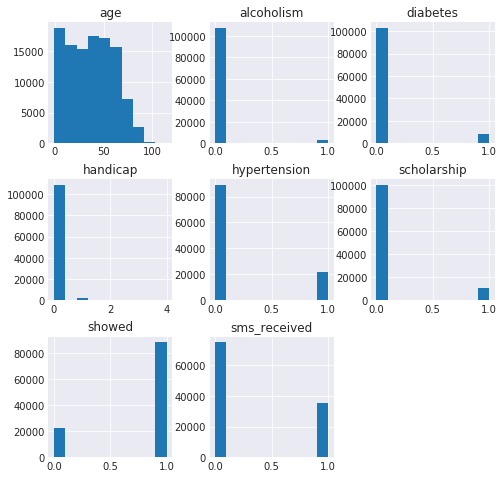

In [20]:
df_noshow.hist(figsize=(8,8));

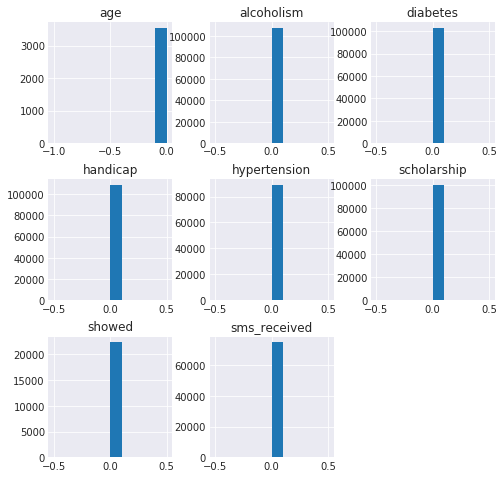

In [23]:
# To check patients having ages below 0

df_noshow[df_noshow <= 0].hist(figsize=(8,8));

In [24]:
df_noshow.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


This shows that we have some ages of patients having less than 0(-1) ages this is a bad value as it was wrongly inputed and needs to be corrected 

In [25]:
min_age = df_noshow[df_noshow['age'] ==-1].index

In [26]:
df_noshow.drop(min_age, inplace=True)

In [27]:
# confirm no row with min value -1

df_noshow[df_noshow['age'] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed


This shows none are having such ages anymore

In [28]:
df_noshow.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## *Exploratory Data Analysis*

## Research Question 1. What is the ratio of people attending/missing appointment?

In [31]:
showed_up = df_noshow.showed == True
not_showed = df_noshow.showed == False


In [32]:
showed = showed_up.mean()
print(showed)

0.798065613521


This shows that approximately 80% of the patients 

In [33]:
missed = not_showed.mean()
print(missed)

0.201934386479


This shows that 20% of them did not show up

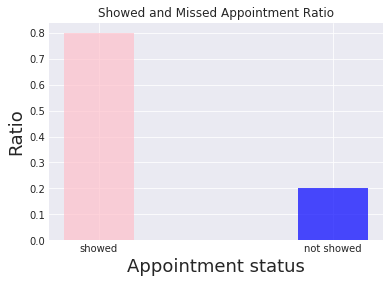

In [74]:
# we will visualize this using the bar chart

def plot(plt):
    return plt
plt.bar(0, showed, width=.3, alpha=0.7, color = 'pink', label='showed' )
plt.bar(1, missed, width=.3, alpha=0.7, color='blue', label='not show' )
plt.xticks([0,1], ['showed', 'not showed'])
plt.xlabel('Appointment status', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Showed and Missed Appointment Ratio')

plt.show();
    

Looking at the visuals as well 80% showed up and 20% did not show up

Ratio of people going or not going for an appointment is 80:20 that is 4:1

## Research Question 2: What gender goes to the doctor more often

In [75]:
df_noshow.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

There are more females in the dataset

In [77]:
# Proportion of females
fm_prop = df_noshow.gender.value_counts()[0] / df_noshow.shape[0]
print(fm_prop)

0.64997376183


65% of females scheduled appointment

In [78]:
# proportion of males
m_prop = df_noshow.gender.value_counts()[1] / df_noshow.shape[0]
print(m_prop)

0.35002623817


Proportion of males that scheduled appointment with the doctor was 35%

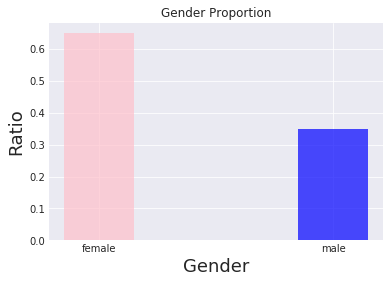

In [79]:
#  Lets visualize this using bar chart

plot(plt)
plt.bar(0, fm_prop, width=.3, alpha=0.7, color = 'pink', label='females' )
plt.bar(1, m_prop, width=.3, alpha=0.7, color='blue', label='males' )
plt.xticks([0,1], ['female', 'male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Gender Proportion')
plt.show();

This shows that the proportion of females that scheduled a the doctor was way more than that of the males

## Research Question 3 : Which of these males and females actually went to see the doctor after scheduling an appointment

In [80]:
#Filter the dataset by gender and value count show and no show values

df_noshow.groupby('gender').showed.value_counts()

gender  showed
F       1         57245
        0         14594
M       1         30962
        0          7725
Name: showed, dtype: int64

For female 57245 showed up after booking an appointment and 14594 did not, more percentage of females showed up

For male 30962 showed up after booking an appointment and 7725 did not, more percentage of males showed up as well

In [81]:
# Group by gender and find the mean value of show rate

df_noshow.groupby('gender').showed.mean()

gender
F    0.796851
M    0.800321
Name: showed, dtype: float64

79.7% OF females showed up after booking an appointment with the doctor while 80% of males showed up after booking an appointment 

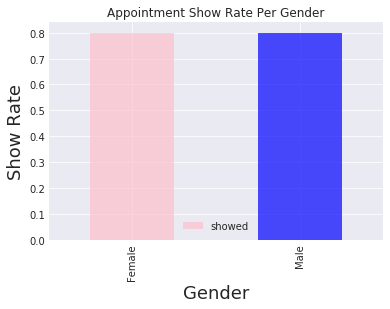

In [82]:
#To visualize this

df_noshow.groupby('gender').showed.mean().plot(kind='bar',  alpha=0.7, color=['pink', 'blue']);

plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Show Rate', fontsize=18)
plt.title('Appointment Show Rate Per Gender')
plt.legend();

Both males and females showed up almost at the same rate which is 80%

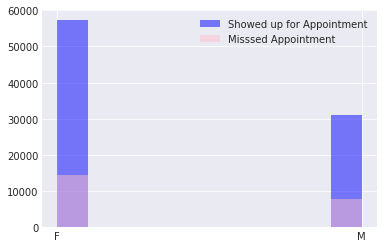

In [87]:
# To put this all together and get a better visualization of the data, will use a bar chart

df_noshow.gender[showed_up].hist(alpha=0.5, color='blue', label = 'Showed up for Appointment')
df_noshow.gender[not_showed].hist(alpha=0.5, color='pink', label = 'Misssed Appointment');
plt.legend();

A large percentage of males and females showed up for their appointment

## Research Question 4: Most common disease amongst patients scheduled for appointment? ¶

In [88]:
# Proportion of those having diabetes
d_prop = df_noshow.diabetes.mean()*100
print(d_prop)

7.18654434251


In [89]:
# Proportion of those that are Handicap

hc_prop = df_noshow.handicap.mean()*100
print(hc_prop)

2.22481588043


In [90]:
# Proportion of those having Hypertension

h_prop = df_noshow.hypertension.mean()*100
print(h_prop)

19.7247706422


In [91]:
# Proportion of those having alcoholism

a_prop = df_noshow.alcoholism.mean()*100
print(a_prop)

3.04000868574


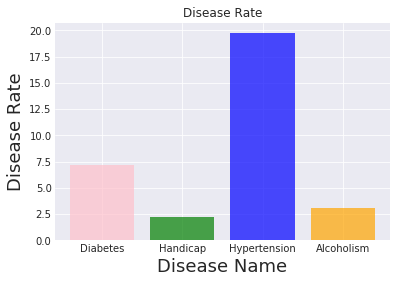

In [92]:
colors = ['pink', 'green', 'blue','orange']
locations = [1, 2, 3, 4]
heights = [d_prop, hc_prop, h_prop, a_prop]
labels = ['Diabetes', 'Handicap', 'Hypertension', 'Alcoholism']

plt.bar(locations, heights, color=colors, alpha=0.7)
plt.xticks(locations, labels)
plt.xlabel('Disease Name', fontsize=18)
plt.ylabel('Disease Rate', fontsize=18)
plt.title('Disease Rate')
plt.legend();

From this we can see that Hypertension is the most common disease for patients who booked an appointment with the doctor having 20%

<a id='conclusions'></a>
## Conclusions

**My findings**

1. 80% of the patients who booked an appointment with th doctor showed up while 20% did not
2. 65% of females go to the doctor more often than the males which is 35%
3. By gender there is no much difference between the rate of show up to appointment as both males and females had 80%
4. Hypertension is the most common disease amongst people scheduled for appointment
5. From our findings patients actually showed up for their appointments after scheduling one



**Limitations**
    
The dataset only contains data for three months in the whole year which is not sufficient to make good analysis and decisions.

In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0